In [1]:
import pandas as pd
import os

# Loading a Data set

In [6]:
all_data = pd.read_csv(r"C:\Users\sacch\OneDrive\Documents\Downloads\all_data.csv")
print(all_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


# Clean up the data

In [7]:
# Check rows of NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
# Drop rows of NAN 
all_data = all_data.dropna(how='all')

In [8]:
# Find 'Or' and delete and update all_data df
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [9]:
#Convert columns to the correct type

#to int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) 
#to float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Augment data with additional columns

# 2: Add Month Column

In [11]:
# Transforming "order date" column 
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# 3: Add a sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# 4: Add a city column

In [13]:
# # Methond 1: Let's use .apply() method 

# all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# all_data.head()

# Methon 2: Function tips with same line above 

def get_city(address):
        return address.split(',')[1]
    
def get_state(address):
        return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
                                               #apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


# What was the best month for sales? how much was earned that month?

In [14]:
results = all_data.groupby('Month').sum()

In [15]:
#Sales only 
all_data.groupby('Month').sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

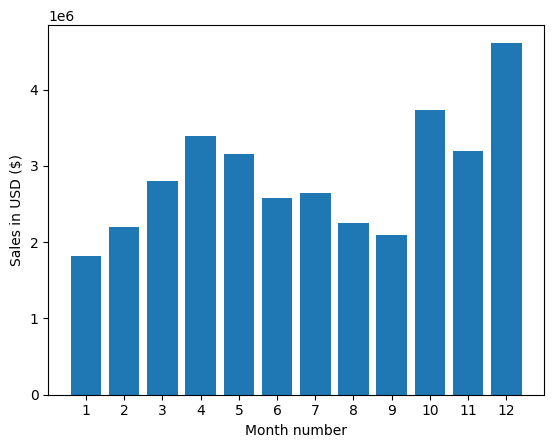

In [16]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales in USD ($)')
plt.show()

# What city had the highest number of sales

In [51]:
# Ensure 'City' column exists
if 'City' not in all_data.columns:
    all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Drop non-numeric columns before summing
numeric_cols = all_data.select_dtypes(include=['number']).columns  # Select only numeric columns
results = all_data.groupby('City')[numeric_cols].sum()  # Group by 'City' and sum only numeric columns

print(results)


                  Quantity Ordered  Price Each   Month       Sales   Minute  \
City                                                                          
Atlanta GA                   16602  2779908.20  104794  2795498.58   442932   
Austin TX                    11153  1809873.61   69829  1819581.75   289060   
Boston MA                    22528  3637409.77  141112  3661642.01   590442   
Dallas TX                    16730  2752627.82  104620  2767975.40   435155   
Los Angeles CA               33289  5421435.23  208325  5452570.80   866638   
New York City NY             27932  4635370.83  175741  4664317.43   733598   
Portland ME                   2750   447189.25   17144   449758.27    72856   
Portland OR                  11303  1860558.22   70621  1870732.34   295533   
San Francisco CA             50239  8211461.74  315520  8262203.91  1319477   
Seattle WA                   16553  2733296.01  104941  2747755.48   436368   

                    Hour  
City                    

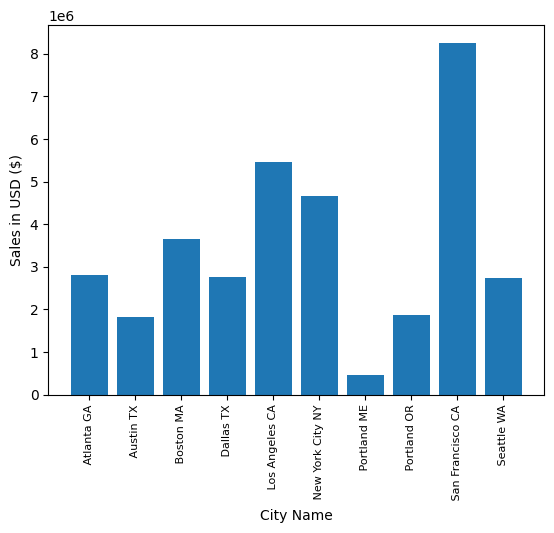

In [19]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation ='vertical', size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()

# What time should we display advertisements to maximize likelihood of customers buying products?

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\sacch\AppData\Local\Temp\ipykernel_11808\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [22]:
# by Minute column
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,27


In [26]:
print(all_data.columns)  # Check available column names


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Minute'],
      dtype='object')


In [27]:
# Convert 'Order Date' column to datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

# Extract hour from the datetime column
all_data['Hour'] = all_data['Order Date'].dt.hour


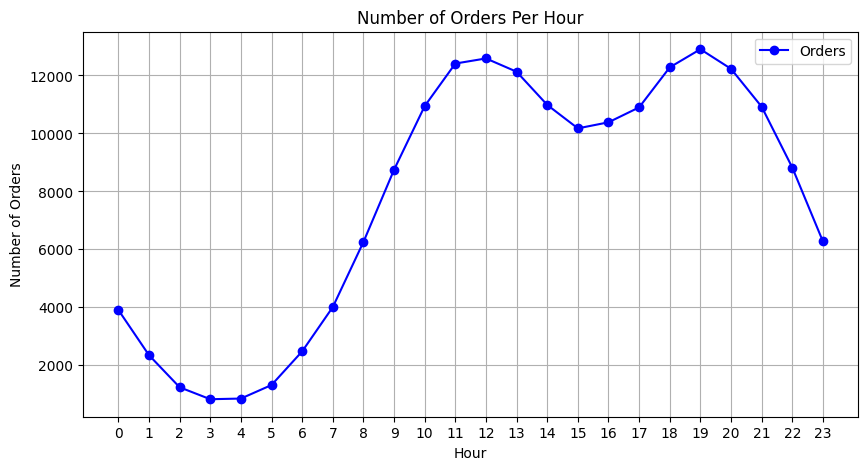

In [28]:
import matplotlib.pyplot as plt

# Check if 'Hour' column exists before proceeding
if 'Hour' in all_data.columns:
    hours = sorted(all_data['Hour'].unique())  # Unique hours in sorted order
    order_counts = all_data.groupby('Hour').size()  # Count of orders per hour

    plt.figure(figsize=(10, 5))
    plt.plot(hours, order_counts, marker='o', linestyle='-', color='b', label="Orders")

    plt.xticks(hours)  
    plt.xlabel('Hour')
    plt.ylabel('Number of Orders')
    plt.title('Number of Orders Per Hour')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("The column 'Hour' does not exist in all_data.")


# What products are most often sold together?

In [29]:
#Get duplicated Order ID's 
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\sacch\AppData\Local\Temp\ipykernel_11808\3234889904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [30]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,38,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,38,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,42,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,42,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,31,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,31,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,0,17,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,0,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,7,11,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,7,11,"Lightning Charging Cable,USB-C Charging Cable"


In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


# 5. What products sold the most? Why do you think it sold the most?

In [37]:
all_data.columns = all_data.columns.str.strip()

In [38]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')


In [39]:
all_data = all_data.dropna(subset=['Quantity Ordered'])


In [40]:
product_group = all_data.groupby('Product')
Quantity_ordered = product_group['Quantity Ordered'].sum()

print(Quantity_ordered)  # Display results


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


In [41]:
import pandas as pd

# Ensure column names are clean
all_data.columns = all_data.columns.str.strip()

# Convert 'Quantity Ordered' to numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

# Drop NaN values
all_data = all_data.dropna(subset=['Quantity Ordered'])

# Group by Product and sum Quantity Ordered
Quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()

print(Quantity_ordered)


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


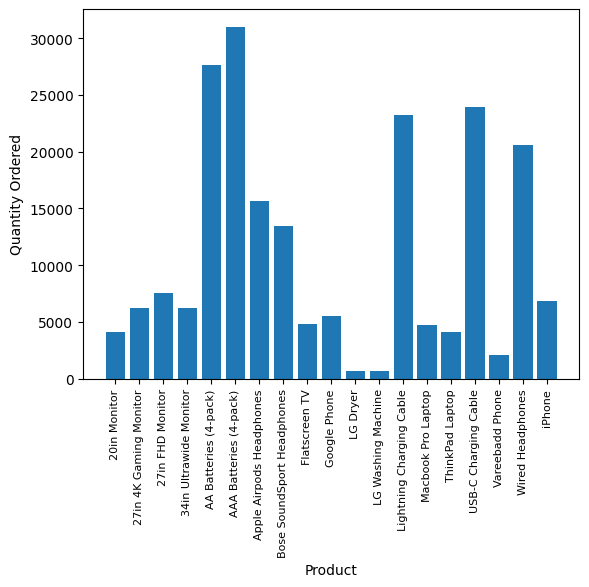

In [43]:
products = [product for product, df in product_group]

plt.bar(products, Quantity_ordered)
plt.xticks(products, rotation ='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

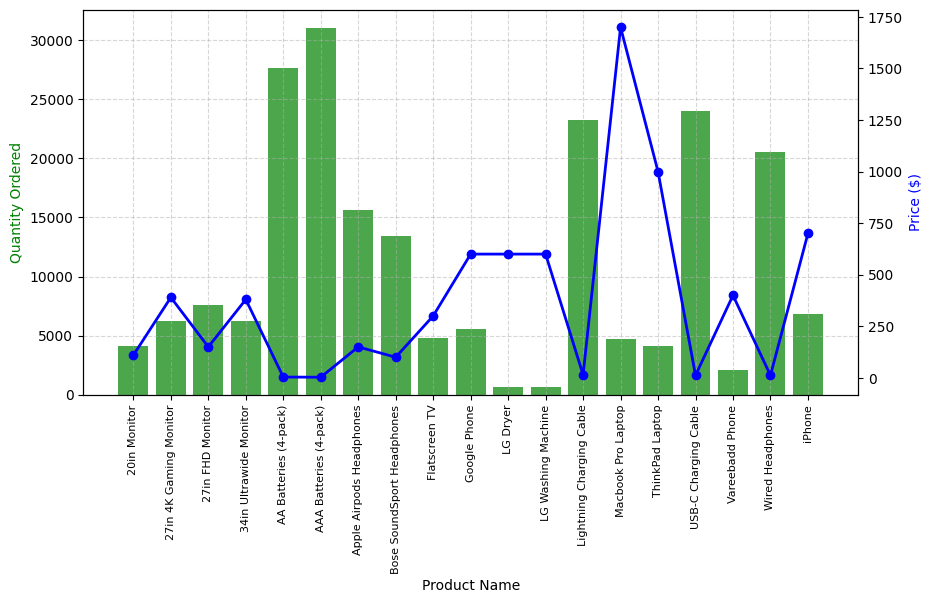

In [46]:
import matplotlib.pyplot as plt

# Calculate required data
Quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()

# Define product names
products = Quantity_ordered.index  # Get product names from index

fig, ax1 = plt.subplots(figsize=(10, 5))  # Adjust figure size

# Create twin axis
ax2 = ax1.twinx()

# Plot bar chart for Quantity Ordered
ax1.bar(products, Quantity_ordered, color='g', alpha=0.7, label='Quantity Ordered')

# Plot line chart for Price Each
ax2.plot(products, prices, color='b', marker='o', linestyle='-', linewidth=2, label='Price Each')

# Labels
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Rotate x-axis labels for readability
ax1.set_xticks(range(len(products)))  # Set tick positions
ax1.set_xticklabels(products, rotation='vertical', size=8)  # Set tick labels

# Show grid
ax1.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()
